# Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler

# set columns show max 25
pd.set_option('display.max_columns', 25)

import warnings
warnings.filterwarnings('ignore')

# Import Libraries

In [2]:
df_test = pd.read_csv("./data/test.csv")

In [3]:
df_train = pd.read_csv("./data/train.csv")

In [4]:
# Concat df_test and df_train
df = pd.concat([df_train, df_test], axis=0)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 74498 entries, 0 to 14899
Data columns (total 24 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Employee ID               74498 non-null  int64 
 1   Age                       74498 non-null  int64 
 2   Gender                    74498 non-null  object
 3   Years at Company          74498 non-null  int64 
 4   Job Role                  74498 non-null  object
 5   Monthly Income            74498 non-null  int64 
 6   Work-Life Balance         74498 non-null  object
 7   Job Satisfaction          74498 non-null  object
 8   Performance Rating        74498 non-null  object
 9   Number of Promotions      74498 non-null  int64 
 10  Overtime                  74498 non-null  object
 11  Distance from Home        74498 non-null  int64 
 12  Education Level           74498 non-null  object
 13  Marital Status            74498 non-null  object
 14  Number of Dependents      7

In [6]:
df.isna().sum()

Employee ID                 0
Age                         0
Gender                      0
Years at Company            0
Job Role                    0
Monthly Income              0
Work-Life Balance           0
Job Satisfaction            0
Performance Rating          0
Number of Promotions        0
Overtime                    0
Distance from Home          0
Education Level             0
Marital Status              0
Number of Dependents        0
Job Level                   0
Company Size                0
Company Tenure              0
Remote Work                 0
Leadership Opportunities    0
Innovation Opportunities    0
Company Reputation          0
Employee Recognition        0
Attrition                   0
dtype: int64

In [7]:
df.duplicated().sum()

0

In [8]:
df.nunique()

Employee ID                 74498
Age                            42
Gender                          2
Years at Company               51
Job Role                        5
Monthly Income               9842
Work-Life Balance               4
Job Satisfaction                4
Performance Rating              4
Number of Promotions            5
Overtime                        2
Distance from Home             99
Education Level                 5
Marital Status                  3
Number of Dependents            7
Job Level                       3
Company Size                    3
Company Tenure                127
Remote Work                     2
Leadership Opportunities        2
Innovation Opportunities        2
Company Reputation              4
Employee Recognition            4
Attrition                       2
dtype: int64

# Data Understanding


### Overview:

The dataset represents various attributes of an employee, providing specific information related to demographics, job role, satisfaction levels, and other related factors. The primary goal of this dataset is to predict employee attrition, helping the company identify which employees are at risk of leaving and understand the factors contributing to their decision.

### Column Descriptions:

**Employee ID**: A unique identifier for the employee.

**Age**: The age of the employee in years.

**Gender**: The gender of the employee.

**Years at Company**: The number of years the employee has been with the company.

**Job Role**: The specific role or title of the employee within the company.

**Monthly Income**: The monthly salary of the employee.

**Work-Life Balance**: The employee's satisfaction with their work-life balance, rated on a scale.

**Job Satisfaction**: The employee's satisfaction with their job, rated on a scale.

**Performance Rating**: The employee's performance rating, likely rated on a scale.

**Number of Promotions**: The total number of promotions the employee has received during their tenure.

**Overtime**: Indicates whether the employee works overtime.

**Distance from Home**: The distance from the employee's home to the workplace.

**Education Level**: The highest level of education attained by the employee.

**Marital Status**: The marital status of the employee.

**Number of Dependents**: The number of dependents relying on the employee.

**Job Level**: The level or seniority of the employee's job role within the company.

**Company Size**: The size of the company.

**Company Tenure**: Likely represents the tenure in some unit.

**Remote Work**: Indicates if the employee has the option to work remotely.

**Leadership Opportunities**: Indicates if the employee has leadership opportunities.

**Innovation Opportunities**: Indicates if the employee has opportunities for innovation.

**Company Reputation**: The employee's perception of the company's reputation, rated on a scale.

**Employee Recognition**: The level of recognition the employee feels they receive from the company, rated on a scale.

**Attrition**: Indicates if the employee is likely to leave the company.

<Axes: xlabel='count', ylabel='Attrition'>

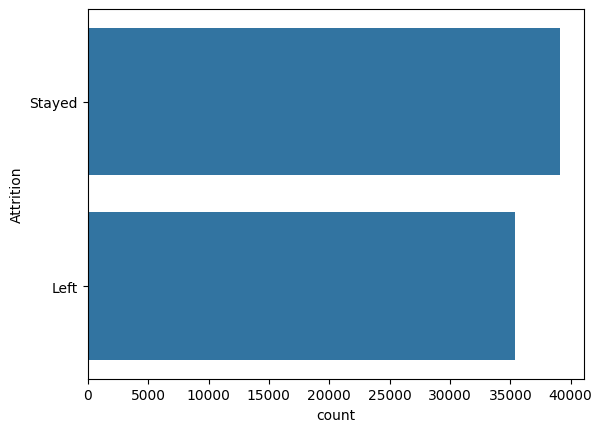

In [9]:
# Distribution class of attrition
sns.countplot(df['Attrition'])

<Axes: xlabel='Age', ylabel='Density'>

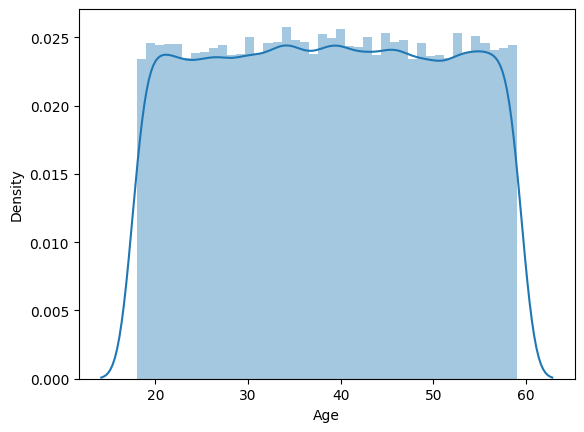

In [10]:
# Distribution of Age
sns.distplot(df['Age'])


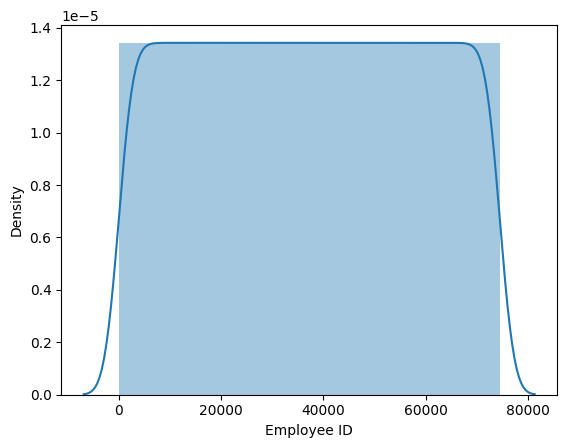

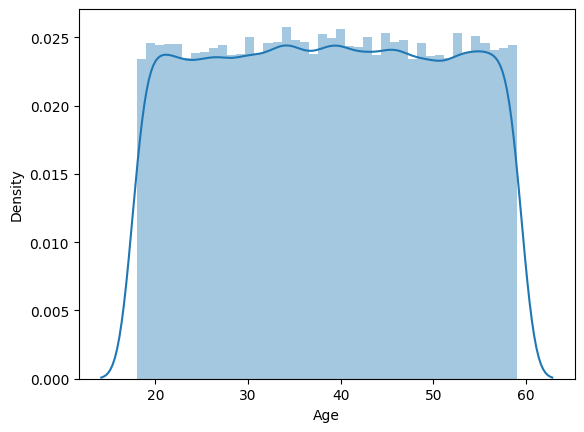

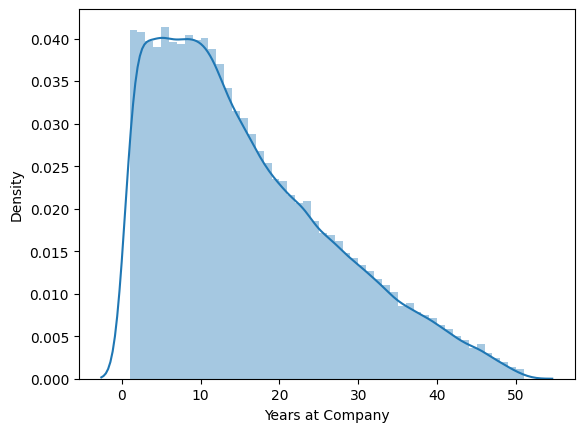

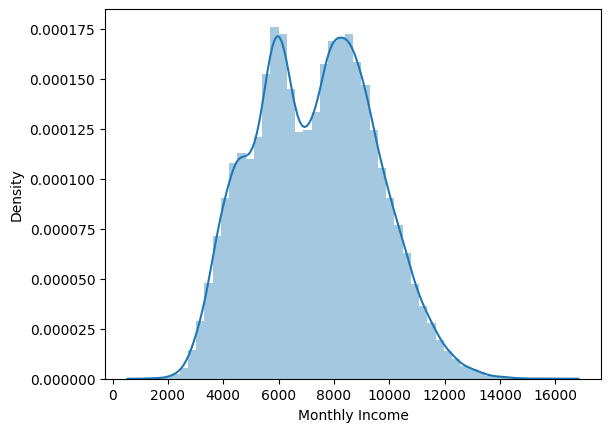

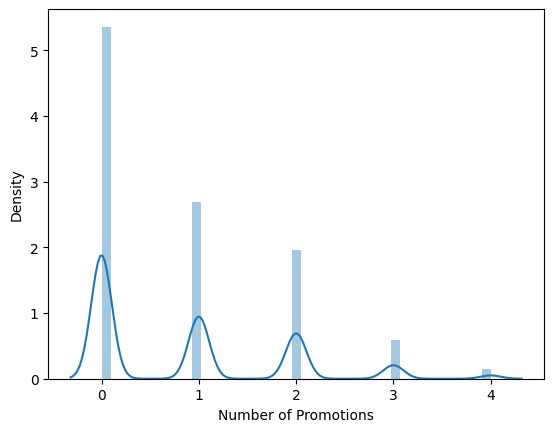

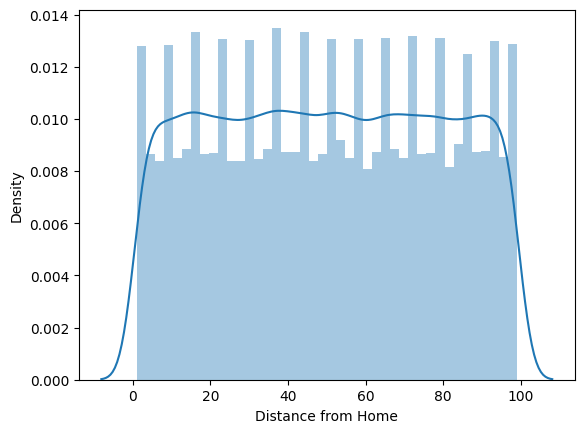

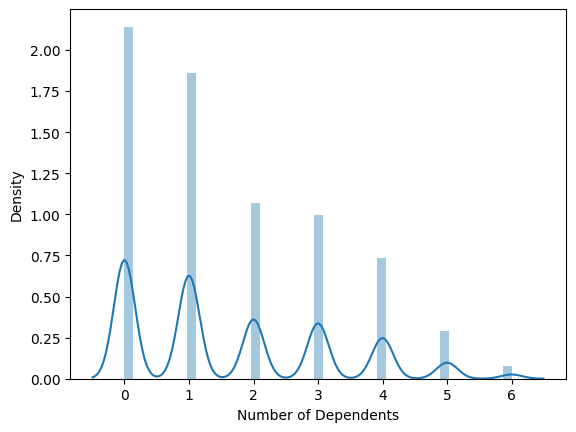

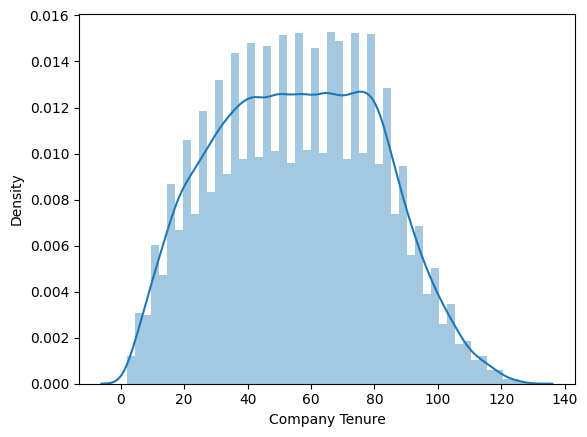

In [11]:
# Distribution numerical features
numerical_features = df.select_dtypes(include=[np.number]).columns
for feature in numerical_features:
    sns.distplot(df[feature])
    plt.show()

# Data Cleaning and Prepocessing


In [12]:
# Drop columns employee id
df = df.drop(columns=['Employee ID'])

In [13]:
# Select columns in the DataFrame 'df' that have numeric data types
numeric_cols = df.select_dtypes(include=[np.number]).columns
print(numeric_cols)

Index(['Age', 'Years at Company', 'Monthly Income', 'Number of Promotions',
       'Distance from Home', 'Number of Dependents', 'Company Tenure'],
      dtype='object')


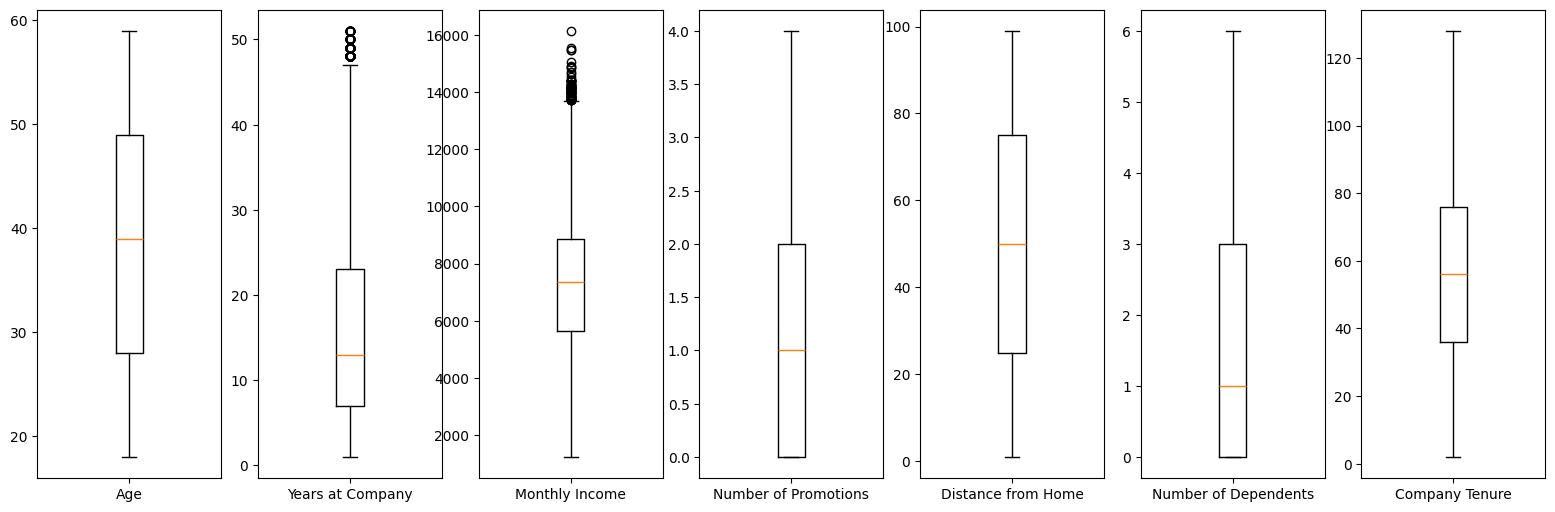

In [14]:
# Set the size of the entire figure
plt.figure(figsize = (28, 28))


# Loop through each numeric column
n=0
for column in numeric_cols:
    n += 1
    plt.subplot(4, 10, n)
    plt.boxplot(df[column].values, labels=[column], showfliers=True)
plt.show()


In [15]:
# List of columns to be included
selected_cols = ['Monthly Income']

In [16]:
# Calculate Q1 (25th percentile) and Q3 (75th percentile) for each column in selected_cols
q1_values = df[selected_cols].quantile(0.25)
q3_values = df[selected_cols].quantile(0.75)

# Calculate Interquartile Range (IQR) and lower/upper bounds for each column
iqr_values = q3_values - q1_values
lower_bounds = q1_values - 1.5 * iqr_values
upper_bounds = q3_values + 1.5 * iqr_values

# Filter the DataFrame based on lower and upper bounds for each column independently
for column in selected_cols:
    # Keep rows where the column value is greater than the lower bound and less than the upper bound
    df = df[(df[column] > lower_bounds[column]) & (df[column] < upper_bounds[column])]


# Encoding

**Ordinal Encoding**

In [17]:
# ordinal encoder on education level High School = 1, Bachelor's Degree = 2, Associate's Degree = 3, Master's Degree = 4, PHD = 5
df["Work-Life Balance"] = df["Work-Life Balance"].map({"Poor": 1, "Fair": 2, "Good": 3, "Excellent": 4})

In [18]:
education_mapping = {
    "High School": 1,
    "Bachelor’s Degree": 2,
    "Associate Degree": 3,
    "Master’s Degree": 4,
    "PhD": 5
}

# Apply the mapping to the 'education' column
df['Education Level'] = df['Education Level'].map(education_mapping)

In [19]:
df["Education Level"].value_counts()

Education Level
2    22312
3    18636
4    15009
1    14668
5     3808
Name: count, dtype: int64

In [20]:
# ordinal encoder on employee recognition
df["Employee Recognition"] = df["Employee Recognition"].map({"Low": 1, "Medium": 2, "High": 3, "Very High": 4})

In [21]:
# Ordinal encoder on company reputation poor = 1, fair = 2, good = 3, excellent = 4
df["Company Reputation"] = df["Company Reputation"].map({"Poor": 1, "Fair": 2, "Good": 3, "Excellent": 4})

In [22]:
# ordinal encoder on job satisfaction Low = 1, Medium = 2, High = 3, Very High = 4
df["Job Satisfaction"] = df["Job Satisfaction"].map({"Low": 1, "Medium": 2, "High": 3, "Very High": 4}) 

In [23]:
# ordinal encoder on performance rating Low = 1, Good = 2, Excellent = 3, Outstanding = 4
df["Performance Rating"] = df["Performance Rating"].map({"Low": 1, "Below Average": 2, "Average": 3, "High": 4}) 

In [24]:
# Ordinal encoder on Job Level Entry = 1, Mid = 2, Senior = 3
df["Job Level"] = df["Job Level"].map({"Entry": 1, "Mid": 2, "Senior": 3}) 

In [25]:
# Ordinal encoder on Company Size Small = 1, Medium = 2, Large = 3
df["Company Size"] = df["Company Size"].map({"Small": 1, "Medium": 2, "Large": 3})

In [26]:
df["Attrition"] = df["Attrition"].map({"Left": 0, "Stayed": 1})

In [27]:
df["Attrition"].value_counts

<bound method IndexOpsMixin.value_counts of 0        1
1        1
2        1
3        1
4        1
        ..
14895    1
14896    0
14897    0
14898    1
14899    0
Name: Attrition, Length: 74433, dtype: int64>

**Label Encoder**

In [28]:
# Label encode on categorical columns
label_encoder = LabelEncoder()

# Label encode 
df["Marital Status"] = label_encoder.fit_transform(df["Marital Status"])
df["Gender"] = label_encoder.fit_transform(df["Gender"])
df["Job Role"] = label_encoder.fit_transform(df["Job Role"])
df["Remote Work"] = label_encoder.fit_transform(df["Remote Work"])
df["Overtime"] = label_encoder.fit_transform(df["Overtime"])
df["Leadership Opportunities"] = label_encoder.fit_transform(df["Leadership Opportunities"])
df["Innovation Opportunities"] = label_encoder.fit_transform(df["Innovation Opportunities"])

In [29]:
df.head()

,Age,Gender,Years at Company,Job Role,Monthly Income,Work-Life Balance,Job Satisfaction,Performance Rating,Number of Promotions,Overtime,Distance from Home,Education Level,Marital Status,Number of Dependents,Job Level,Company Size,Company Tenure,Remote Work,Leadership Opportunities,Innovation Opportunities,Company Reputation,Employee Recognition,Attrition
0,31,1,19,0,5390,4,2,3,2,0,22,3,1,0,2,2,89,0,0,0,4,2,1
1,59,0,4,3,5534,1,3,1,3,0,21,4,0,3,2,2,21,0,0,0,2,1,1
2,24,0,10,2,8159,3,3,1,0,0,11,2,1,3,2,2,74,0,0,0,1,1,1
3,36,0,7,0,3989,3,3,4,1,0,27,1,2,2,2,1,50,1,0,0,3,2,1
4,56,1,41,0,4821,2,4,3,0,1,71,1,0,0,3,2,68,0,0,0,2,2,1


In [30]:
# Standar scaler without Attrition column
attrition = df['Attrition']
df_to_scale = df.drop(columns=['Attrition'])

# Initialize StandardScaler
scaler = StandardScaler()
df_scaled = pd.DataFrame(scaler.fit_transform(df_to_scale), columns=df_to_scale.columns)

# Reset index
df_scaled.index = df.index

# Reattach the excluded column
df_scaled['Attrition'] = attrition

# Heatmap

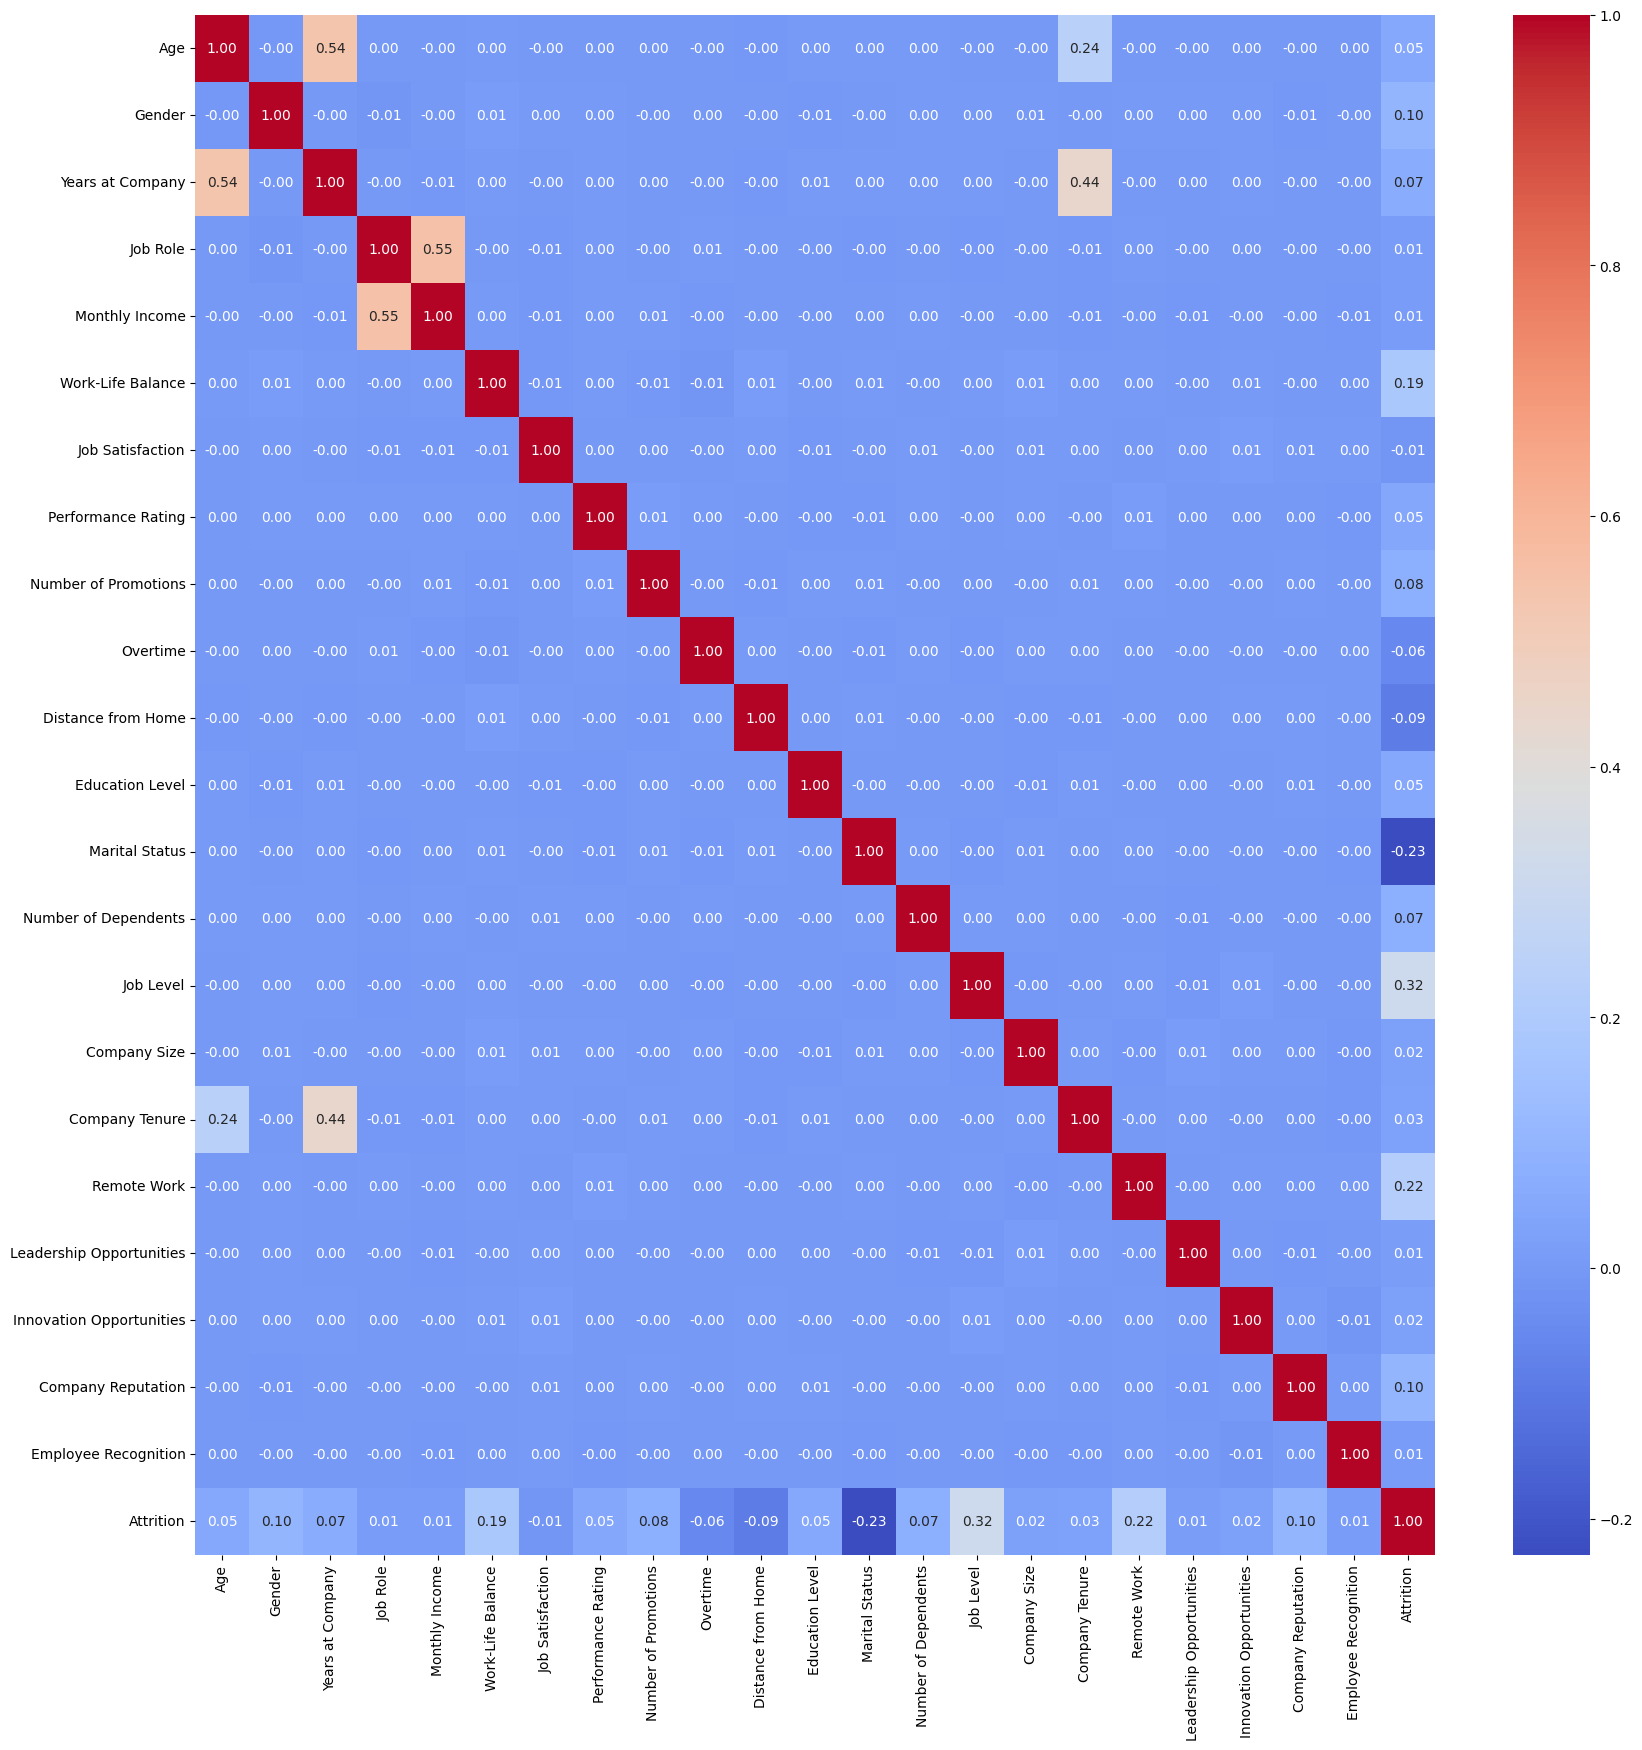

In [31]:
# Heatmap
plt.figure(figsize=(20, 20))
sns.heatmap(df.corr(), annot=True, fmt='.2f', cmap='coolwarm')
plt.show()

In [34]:
df.columns

Index(['Age', 'Gender', 'Years at Company', 'Job Role', 'Monthly Income',
       'Work-Life Balance', 'Job Satisfaction', 'Performance Rating',
       'Number of Promotions', 'Overtime', 'Distance from Home',
       'Education Level', 'Marital Status', 'Number of Dependents',
       'Job Level', 'Company Size', 'Company Tenure', 'Remote Work',
       'Leadership Opportunities', 'Innovation Opportunities',
       'Company Reputation', 'Employee Recognition', 'Attrition'],
      dtype='object')

In [32]:
# # save the df into csv
# df_scaled.to_csv("preprocessed/df_scaled.csv", index=False)
df.to_csv("preprocessed/df.csv", index=False)

## End  